In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rio
import matplotlib.pyplot as plt

In [69]:
fp = os.path.join('data/Palisades_Perimeter/Palisades_Perimeter_20250121.shp')
pal_perm = gpd.read_file(fp)

fp = os.path.join('data/Eaton_Perimeter/Eaton_Perimeter_20250121.shp')
eat_perm = gpd.read_file(fp)

eji = gpd.read_file("data/EJI_2024_United_States/EJI_2024_United_States.gdb")

## 1. Metadata exploration
Review the CSV with the metadata information for the EJI data.

Look at the variables and with your team select a few variables that, in your opinion, could influence a community’s response to a wildfire. 

In [70]:
eji.columns = eji.columns.str.lower()
eji

,objectid,statefp,countyfp,tractce,affgeoid,geoid,geoid_2020,county,statedesc,stateabbr,...,twomore,e_twomore,otherrace,e_otherrace,tribe_pct_tract,tribe_names,tribe_flag,shape_length,shape_area,geometry
0,835,01,089,003100,140000US01089003100,01089003100,01089003100,Madison County,Alabama,AL,...,381.0,7.1,0.0,0.0,0.0,-999,-999,8510.888655,4.333530e+06,"MULTIPOLYGON (((852482.839 -266767.398, 853314..."
1,928,01,095,031200,140000US01095031200,01095031200,01095031200,Marshall County,Alabama,AL,...,276.0,4.7,0.0,0.0,0.0,-999,-999,22311.962049,2.907722e+07,"MULTIPOLYGON (((896720.330 -319662.354, 896744..."
2,605,01,073,012401,140000US01073012401,01073012401,01073012401,Jefferson County,Alabama,AL,...,152.0,4.2,0.0,0.0,0.0,-999,-999,10719.250036,4.753795e+06,"MULTIPOLYGON (((837006.682 -399280.247, 837159..."
3,500,01,073,003400,140000US01073003400,01073003400,01073003400,Jefferson County,Alabama,AL,...,51.0,2.7,0.0,0.0,0.0,-999,-999,6199.992414,2.044441e+06,"MULTIPOLYGON (((837411.783 -407460.771, 837500..."
4,540,01,073,010402,140000US01073010402,01073010402,01073010402,Jefferson County,Alabama,AL,...,22.0,0.8,0.0,0.0,0.0,-999,-999,7419.649259,2.403345e+06,"MULTIPOLYGON (((831455.566 -422273.151, 832285..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85180,85171,78,010,971200,140000US78010971200,78010971200,78010971200,St. Croix Island,United States Virgin Islands,VI,...,-999.0,-999.0,-999.0,-999.0,0.0,-999,-999,13334.672970,6.251142e+06,"MULTIPOLYGON (((3376821.625 -1619294.010, 3377..."
85181,85185,78,030,960900,140000US78030960900,78030960900,78030960900,St. Thomas Island,United States Virgin Islands,VI,...,-999.0,-999.0,-999.0,-999.0,0.0,-999,-999,27507.640374,8.175590e+06,"MULTIPOLYGON (((3357342.662 -1556347.913, 3357..."
85182,85174,78,010,971500,140000US78010971500,78010971500,78010971500,St. Croix Island,United States Virgin Islands,VI,...,-999.0,-999.0,-999.0,-999.0,0.0,-999,-999,9439.126938,4.531441e+06,"MULTIPOLYGON (((3386421.950 -1611349.951, 3386..."
85183,85173,78,010,971400,140000US78010971400,78010971400,78010971400,St. Croix Island,United States Virgin Islands,VI,...,-999.0,-999.0,-999.0,-999.0,0.0,-999,-999,33579.027069,2.286307e+07,"MULTIPOLYGON (((3389638.925 -1616116.052, 3389..."


e_pov200
e_unemp
e_uninsur

In [73]:
pal_perm = pal_perm.to_crs(eji.crs)

eji_pal = gpd.sjoin(eji, pal_perm)

In [74]:
eji_pal

,objectid,statefp,countyfp,tractce,affgeoid,geoid,geoid_2020,county,statedesc,stateabbr,...,tribe_names,tribe_flag,shape_length,shape_area,geometry,index_right,OBJECTID,type,Shape__Are,Shape__Len
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-2045938.733 -143906.769, -204...",0,1,Heat Perimeter,1.182082e+03,267.101144
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-2045938.733 -143906.769, -204...",1,2,Heat Perimeter,2.222488e+03,185.498783
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-2045938.733 -143906.769, -204...",2,3,Heat Perimeter,2.101172e+01,22.412814
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-2045938.733 -143906.769, -204...",9,10,Heat Perimeter,7.939795e+04,2620.515743
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-2045938.733 -143906.769, -204...",10,11,Heat Perimeter,2.207031e+01,21.680935
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-2045938.733 -143906.769, -204...",11,12,Heat Perimeter,4.358203e+01,26.750707
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-2045938.733 -143906.769, -204...",13,14,Heat Perimeter,2.114520e+03,192.800226
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-2045938.733 -143906.769, -204...",12,13,Heat Perimeter,9.960938e+00,14.600921
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-2045938.733 -143906.769, -204...",4,5,Heat Perimeter,4.420345e+04,1569.259764
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-2045938.733 -143906.769, -204...",3,4,Heat Perimeter,2.149922e+02,76.639180


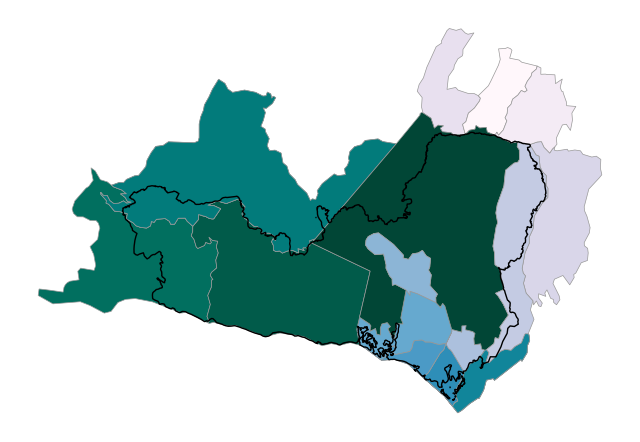

In [90]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
eji_pal.plot(
    ax=ax,
    column= 'tractce',
    cmap='PuBuGn',
    legend=False,
    edgecolor="0.6",
    linewidth=0.5
)
pal_perm.plot(ax=ax, edgecolor = "black", color = "none")
plt.show()

## 3. Polygon clipping

In [88]:
eat_perm = eat_perm.to_crs(eji.crs)

eji_eat = gpd.clip(eji, eat_perm)
eji_eat

,objectid,statefp,countyfp,tractce,affgeoid,geoid,geoid_2020,county,statedesc,stateabbr,...,twomore,e_twomore,otherrace,e_otherrace,tribe_pct_tract,tribe_names,tribe_flag,shape_length,shape_area,geometry
7977,6969,06,037,430501,140000US06037430501,06037430501,06037430501,Los Angeles County,California,CA,...,156.0,3.4,0.0,0.0,0.0,-999,-999,9907.268571,4.707551e+06,"MULTIPOLYGON (((-2000929.440 -139107.200, -200..."
10694,7034,06,037,460002,140000US06037460002,06037460002,06037460002,Los Angeles County,California,CA,...,230.0,8.3,7.0,0.3,0.0,-999,-999,6381.774407,1.564005e+06,"POLYGON ((-2001958.110 -139336.735, -2001675.6..."
13255,7065,06,037,462500,140000US06037462500,06037462500,06037462500,Los Angeles County,California,CA,...,482.0,7.5,15.0,0.2,0.0,-999,-999,9185.154138,2.581995e+06,"MULTIPOLYGON (((-2003421.002 -138950.166, -200..."
8713,7033,06,037,460001,140000US06037460001,06037460001,06037460001,Los Angeles County,California,CA,...,55.0,2.9,0.0,0.0,0.0,-999,-999,14663.758836,5.180980e+06,"MULTIPOLYGON (((-2002985.451 -136681.146, -200..."
10915,7049,06,037,461300,140000US06037461300,06037461300,06037461300,Los Angeles County,California,CA,...,594.0,9.0,0.0,0.0,0.0,-999,-999,8454.582265,1.937905e+06,"MULTIPOLYGON (((-2006271.109 -137209.873, -200..."
13069,7048,06,037,461200,140000US06037461200,06037461200,06037461200,Los Angeles County,California,CA,...,296.0,7.0,32.0,0.8,0.0,-999,-999,8342.245148,2.433767e+06,"MULTIPOLYGON (((-2006235.842 -136369.443, -200..."
4631,7051,06,037,461501,140000US06037461501,06037461501,06037461501,Los Angeles County,California,CA,...,231.0,6.4,4.0,0.1,0.0,-999,-999,4163.166698,1.004134e+06,"POLYGON ((-2006809.360 -137145.131, -2006805.3..."
9781,7045,06,037,460900,140000US06037460900,06037460900,06037460900,Los Angeles County,California,CA,...,199.0,3.0,6.0,0.1,0.0,-999,-999,7647.886309,2.459242e+06,"MULTIPOLYGON (((-2008580.831 -136312.965, -200..."
11674,7047,06,037,461100,140000US06037461100,06037461100,06037461100,Los Angeles County,California,CA,...,138.0,2.7,0.0,0.0,0.0,-999,-999,5979.795733,1.955140e+06,"MULTIPOLYGON (((-2007840.532 -135700.527, -200..."
7806,7046,06,037,461000,140000US06037461000,06037461000,06037461000,Los Angeles County,California,CA,...,170.0,2.9,13.0,0.2,0.0,-999,-999,6432.717801,1.774083e+06,"MULTIPOLYGON (((-2008629.351 -135155.038, -200..."


In [92]:
eji_pal_clip = gpd.clip(eji, pal_perm)
eji_pal_clip

,objectid,statefp,countyfp,tractce,affgeoid,geoid,geoid_2020,county,statedesc,stateabbr,...,twomore,e_twomore,otherrace,e_otherrace,tribe_pct_tract,tribe_names,tribe_flag,shape_length,shape_area,geometry
10133,7883,06,037,800504,140000US06037800504,06037800504,06037800504,Los Angeles County,California,CA,...,10.0,0.5,132.0,7.0,0.0,-999,-999,32274.194821,2.147834e+07,"POLYGON ((-2058434.988 -137285.670, -2058471.5..."
10112,6497,06,037,262301,140000US06037262301,06037262301,06037262301,Los Angeles County,California,CA,...,152.0,5.4,19.0,0.7,0.0,-999,-999,21647.980620,1.307306e+07,"POLYGON ((-2041708.219 -134408.613, -2041704.5..."
10748,7865,06,037,800104,140000US06037800104,06037800104,06037800104,Los Angeles County,California,CA,...,205.0,5.6,184.0,5.0,0.0,-999,-999,44314.490725,3.428411e+07,"MULTIPOLYGON (((-2049666.263 -137203.953, -204..."
5529,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,...,72.0,2.1,0.0,0.0,0.0,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-2045880.957 -143822.193, -204..."
8170,6506,06,037,262802,140000US06037262802,06037262802,06037262802,Los Angeles County,California,CA,...,230.0,6.5,0.0,0.0,0.0,-999,-999,11283.870099,3.333633e+06,"MULTIPOLYGON (((-2044735.507 -144590.598, -204..."
11349,6504,06,037,262704,140000US06037262704,06037262704,06037262704,Los Angeles County,California,CA,...,379.0,10.6,9.0,0.3,0.0,-999,-999,7451.682560,1.807297e+06,"MULTIPOLYGON (((-2047506.347 -142893.498, -204..."
6107,6501,06,037,262501,140000US06037262501,06037262501,06037262501,Los Angeles County,California,CA,...,168.0,4.5,0.0,0.0,0.0,-999,-999,5914.202762,1.626407e+06,"POLYGON ((-2044953.472 -142094.149, -2044537.4..."
10052,6503,06,037,262604,140000US06037262604,06037262604,06037262604,Los Angeles County,California,CA,...,518.0,9.0,0.0,0.0,0.0,-999,-999,15454.353767,5.670518e+06,"MULTIPOLYGON (((-2048368.176 -141863.976, -204..."
10134,7884,06,037,800506,140000US06037800506,06037800506,06037800506,Los Angeles County,California,CA,...,208.0,6.1,143.0,4.2,0.0,-999,-999,28314.803172,2.635878e+07,"MULTIPOLYGON (((-2055483.941 -137527.251, -205..."
13260,6502,06,037,262601,140000US06037262601,06037262601,06037262601,Los Angeles County,California,CA,...,231.0,6.9,62.0,1.9,0.0,-999,-999,10405.199643,3.639887e+06,"POLYGON ((-2048425.518 -138234.410, -2048189.9..."


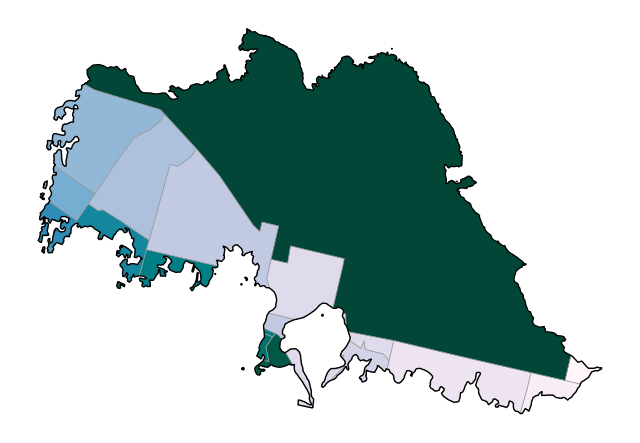

In [94]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
eji_eat.plot(
    ax=ax,
    column= 'tractce',
    cmap='PuBuGn',
    legend=False,
    edgecolor="0.6",
    linewidth=0.5
)
eat_perm.plot(ax=ax, edgecolor = "black", color = "none")
plt.show()

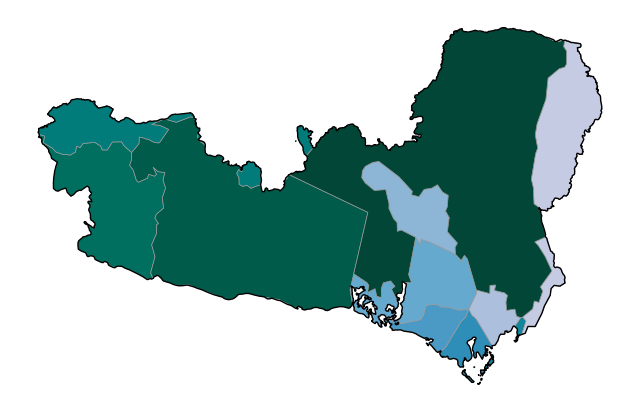

In [93]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
eji_pal_clip.plot(
    ax=ax,
    column= 'tractce',
    cmap='PuBuGn',
    legend=False,
    edgecolor="0.6",
    linewidth=0.5
)
pal_perm.plot(ax=ax, edgecolor = "black", color = "none")
plt.show()

## 4. Visualize fire perimeters with a basemap

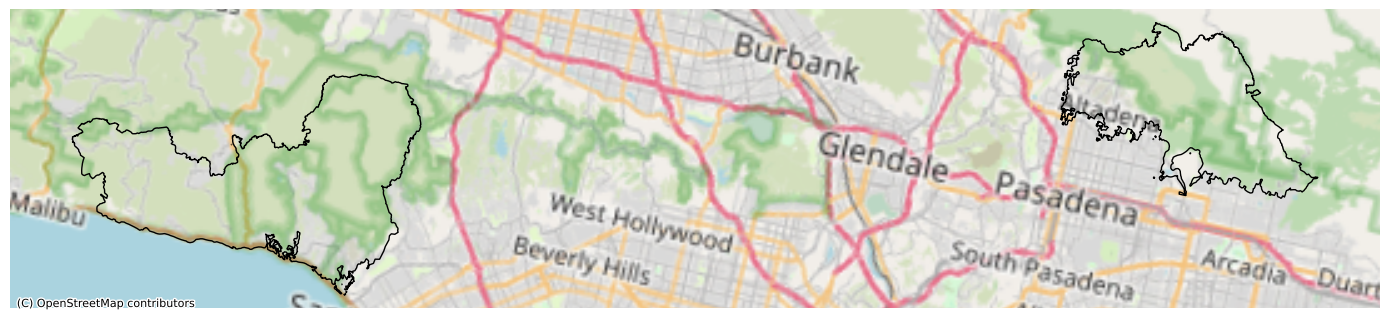

In [101]:
import contextily as ctx
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

pal_perm.plot(ax=ax, edgecolor = "black", color = "none")
eat_perm.plot(ax=ax, edgecolor = "black", color = "none")
# Add basemap using contextily


ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs = pal_perm.crs)


# ADD LEGEND OR ANNOTATION TO IDENTIFY EACH FIRE

# ADD TITLE

ax.axis('off')

plt.tight_layout()
plt.show()

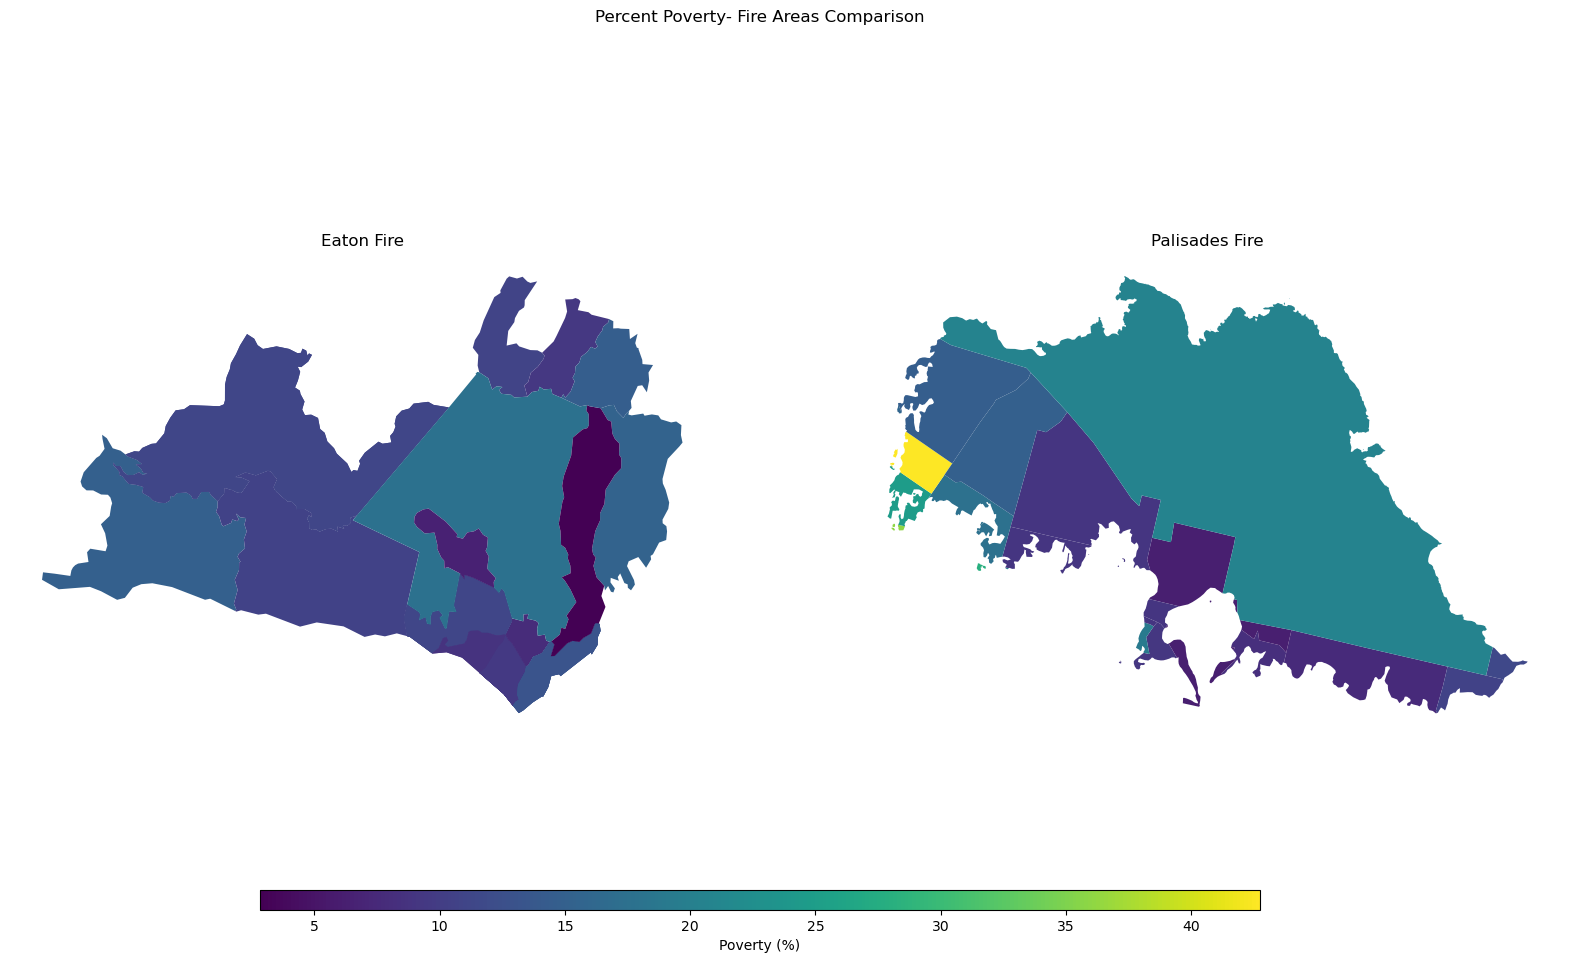

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = 'e_pov200'

# Find common min/max for legend range
vmin = min(eji_pal[eji_variable].min(), eji_eat[eji_variable].min())
vmax = max(eji_pal[eji_variable].max(), eji_eat[eji_variable].max())

# Plot census tracts within Palisades perimeter
eji_pal.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
)
ax1.set_title('Eaton Fire')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eji_eat.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
)
ax2.set_title('Palisades Fire')
ax2.axis('off')

# Add overall title
fig.suptitle('Percent Poverty- Fire Areas Comparison')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Poverty (%)')

plt.show()